# Stock Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
companies_list = ['AAPL_data.csv', 'GOOG_data.csv', 'AMZN_data.csv', 'MSFT_data.csv']

In [3]:
all_data = pd.DataFrame()

In [4]:
df_list = [pd.read_csv(company) for company in companies_list]
all_data = pd.concat(df_list)

In [5]:
all_data.shape

(4752, 7)

In [6]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
# Analysing closing price of all stocks 

all_data['Name'].unique()

array(['AAPL', 'GOOG', 'AMZN', 'MSFT'], dtype=object)

In [8]:
tech_giants = all_data['Name'].unique()

In [9]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [10]:
all_data['date'] = pd.to_datetime(all_data['date'])

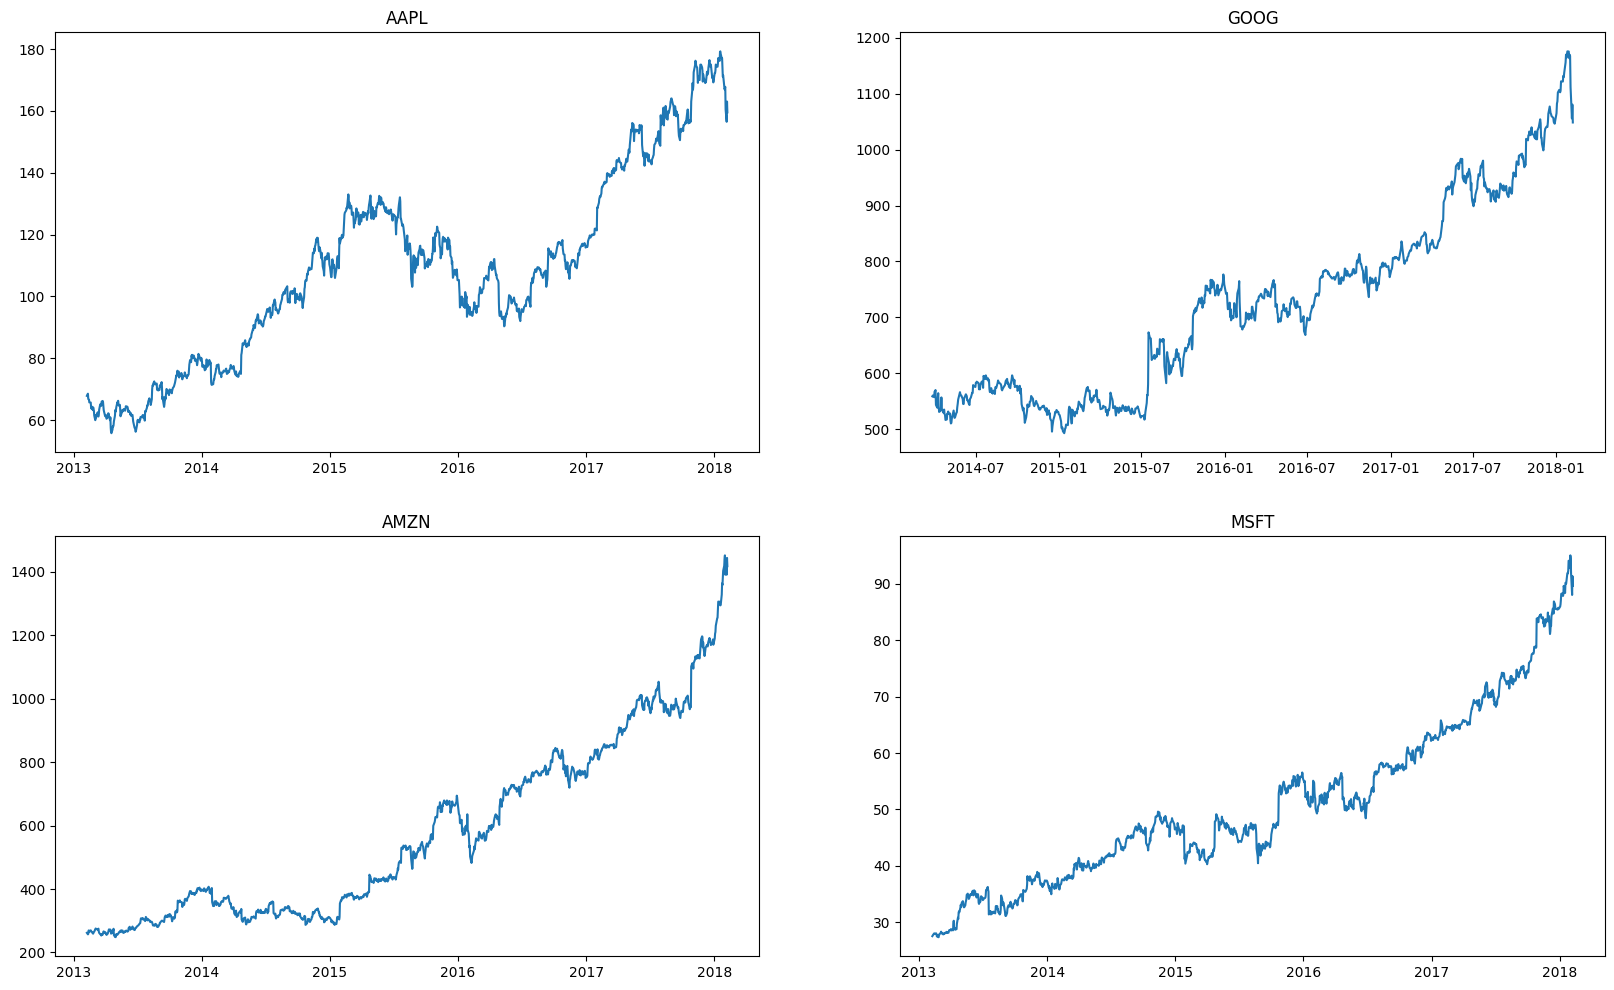

In [11]:
plt.figure(figsize = (20, 12))

for index, company in enumerate(tech_giants, 1):

  plt.subplot(2,2,index)
  df = all_data[all_data['Name']==company]
  plt.plot(df['date'], df['close']) # x,y 
  plt.title(company)

In [12]:
# Analysing the total volume of stock being traded per day 

import plotly.express as px

for company in tech_giants:
  df = all_data[all_data['Name']==company]
  daily_vol = px.line(df, 'date', 'volume', title=company)
  daily_vol.show()

In [13]:
# Analysing daily returns of Apple 

df_apple = pd.read_csv('AAPL_data.csv')
df_apple.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [17]:
df_apple['daily_return']=df_apple['close']-df_apple['open']

In [21]:
df_apple['daily_return%']=((df_apple['close']-df_apple['open'])/df_apple['close'])*100
df_apple.head()

,date,open,high,low,close,volume,Name,daily_return%,daily_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.206325,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.714688,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.481344,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.042869,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.443624,0.2957


In [29]:
min_return_idx = df_apple['daily_return'].idxmin()
max_return_idx = df_apple['daily_return'].idxmax()

print(f"The date with the lowest daily return is: {df_apple.loc[min_return_idx, 'date']} : {df_apple.loc[min_return_idx, 'daily_return']}")
print(f"The date with the highest daily return is: {df_apple.loc[max_return_idx, 'date']} : {df_apple.loc[max_return_idx, 'daily_return']}")


The date with the lowest daily return is: 2015-08-25 : -7.3700000000000045
The date with the highest daily return is: 2015-08-24 : 8.25


In [26]:
import plotly.express as px

fig = px.line(df_apple, x='date', y='daily_return%', title='')
fig.show()

<Axes: >

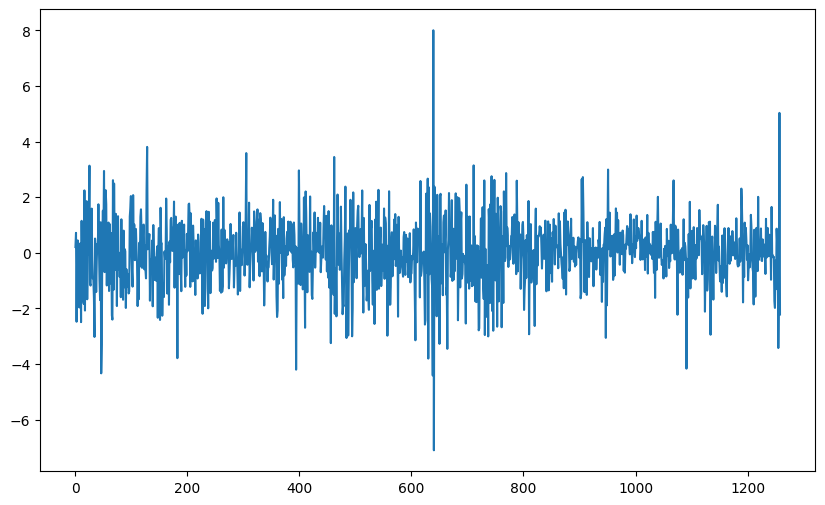

In [27]:
plt.figure(figsize=(10,6))
df_apple['daily_return%'].plot()

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2016-03-17'),
  Text(0.0, 0, '2016-01-04'),
  Text(10.0, 0, '2016-01-19'),
  Text(20.0, 0, '2016-02-02'),
  Text(30.0, 0, '2016-02-17'),
  Text(40.0, 0, '2016-03-02'),
  Text(50.0, 0, '2016-03-16'),
  Text(60.0, 0, '2016-03-31'),
  Text(70.0, 0, '')])

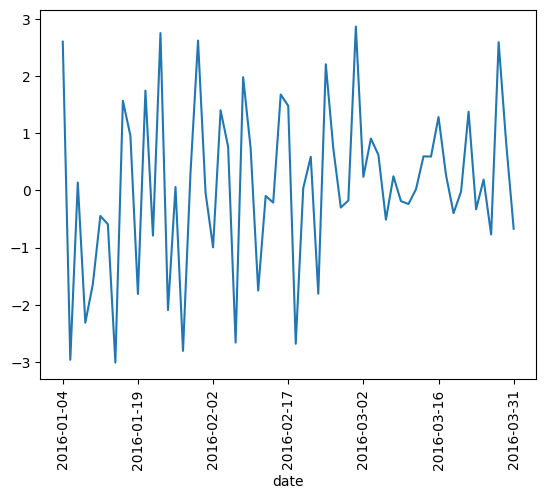

In [28]:
df_apple.set_index('date')['2016-01-01':'2016-03-31']['daily_return%'].plot()
plt.xticks(rotation='vertical')

# Checking correlation - correlation != causation

In [31]:
aapl=pd.read_csv('AAPL_data.csv')
goog=pd.read_csv('GOOG_data.csv')
amzn=pd.read_csv('AMZN_data.csv')
msft=pd.read_csv('MSFT_data.csv')

In [32]:
close = pd.DataFrame()

In [33]:
close['aapl'] = aapl['close']
close['goog'] = goog['close']
close['amzn'] = amzn['close']
close['msft'] = msft['close']

In [34]:
close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


In [37]:
import seaborn as sns

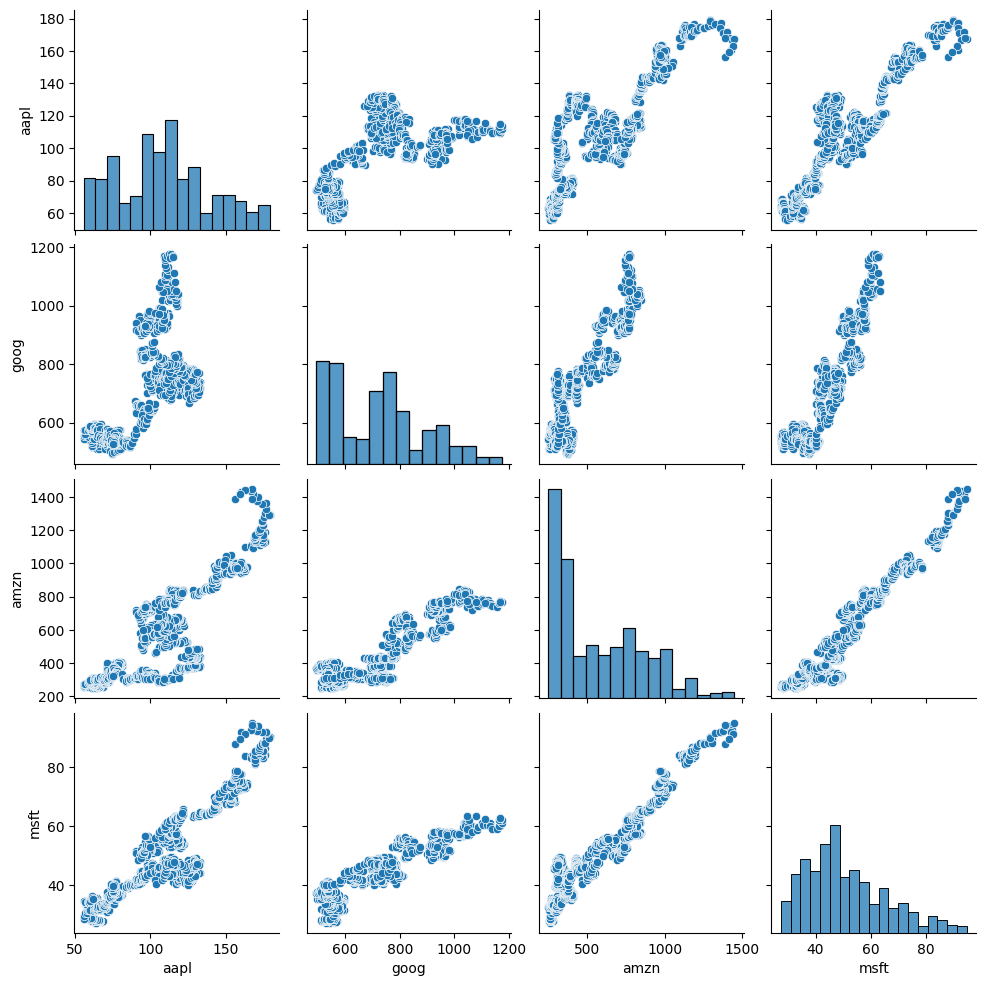

In [38]:
sns.pairplot(data=close)

<Axes: >

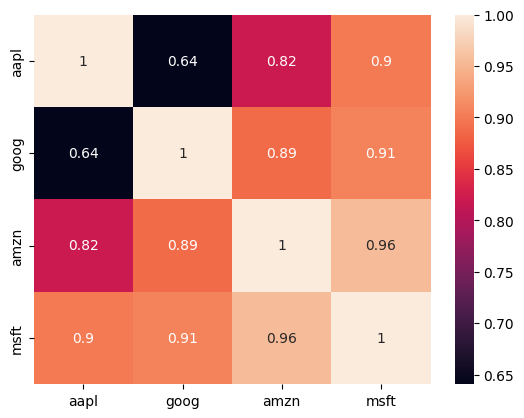

In [39]:
sns.heatmap(close.corr(),annot=True)

The closing prices of Amazon and Microsoft have a correlation of 0.96 - if the closing price of AMZN increases, then there is a 96% chance that the MSFT price will also increase

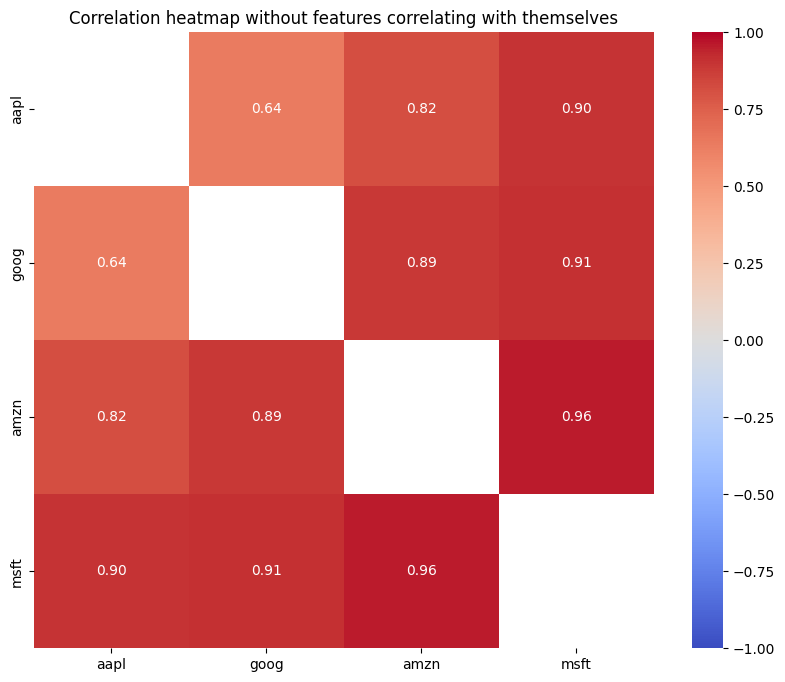

In [40]:
corr = close.corr()

# set the diagonal elements to NaN
for i in range(corr.shape[0]):
    corr.iat[i, i] = np.nan

# plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)

plt.title('Correlation heatmap without features correlating with themselves')
plt.show()